In [7]:
#SET GLOBAL VARS AND IMPORTS

from draftbot_sim_adapted import *
from Experimentation_Utils import *
from Agents import *
import sqlite3
import pandas as pd
import numpy as np
import json
import os

import matplotlib.pyplot as plt

##GLOBAL VARS

draft_str='C:/Users/trist/OneDrive/Documents/draft_data_public.VOW.PremierDraft.csv'

#Have a couple versions of new/retooled bots to make sure the behavior makes sense over time
#Now all bots should auto-generate a unique name so you can differentiate these
agents = [Basic_Agent(),
Greedy_Agent(),
Arch_Reciever_Agent(),
Med_Agent(),
Dummy_Agent(),
Force_K_Agent(k_forced=5),
Force_K_Agent(k_forced=15),
Force_K_Agent(k_forced=30),
Arch_Pass_Agent(),
Hard_Agent(),
Hard_Agent(bias_function='log10'),
Hard_Agent(bias_function='ln')
]

def run_experiments(weights_list:list,n_iter=4200):
    "Iterate through a folder of weights and automatically generate our experiment data"
    #for each item in our processed weights directory
    for it in weights_list:
        #Iterate through our files
        string = 'weights_data/processed_weights' + '/' + it 
        simulation_generator(draft_str,string, agents, n_iter, 11)

def update_experiments(path:str,n_iter=4200):
    "Iterate through a folder of weights and automatically generate our experiment data"
    #for each item in our processed weights directory
    for it in os.listdir('weights_data/processed_weights'):

        #Iterate through our files
        string = 'weights_data/processed_weights' + '/' + it 
        simulation_generator(draft_str,string, agents, n_iter, 11)

        #no return, this function works on the device

def display_draftwise_results(result_path,include_t3_data=False,n_picks=42):
    """Present results that show what % the bots match 
    human picks given the filename holding the picks"""

    #Read csv
    df = pd.read_csv(result_path)

    #Get rid of dummy index column
    df = df.iloc[:,1:]

    #If you also want to know about t3 data, you can set this flag to true
    if include_t3_data == False:
        
        #Remove all cols that include the str t3
        df = df.loc[:,~df.columns.str.contains('t3')]
    
    #Mean here is avg # of picks matched, so the rate is the avg/total picks
    results = df.mean()/n_picks
    results = results.sort_values(ascending=False)
    print(results)

def display_pickwise_results(performance_string, visualization='table'):
    """Present results that show % bots match human picks at the pick level. 
    That is, if there are 3 packs of 14 cards, then there are 42 picks at which
    the bots will have different accuracies. Each multiple of 14 will have an
    accuracy of 100% since you can only pick from one card at these points"""

    df = pd.read_csv(performance_string)

    df.rename(columns={'Unnamed: 0':'match_index'}, inplace=True)

    #only include cols that keep track of our match boolean values
    #also set all colnames to lowercase because some old files have diff capitilzation patterns
    df.columns = df.columns.str.lower()
    df = df.loc[:,df.columns.str.contains('match')]

    #Sub out the text from our input file (Python isn't reading the T/F as boolean by default)
    #df = df.replace({False: 0, True: 1})
    output_df = df.groupby('match_index').mean()

    #Print a df where we have 42 rows (1 per pick in a standard draft), where each bot has an accuracy %
    if visualization=='table':
        return output_df

    #If you also want a plot, add this logic in here
    else:
    
        df.groupby('match_index').mean().plot()

        #Move legend off to the side
        plt.legend(loc=(1.04,.35))

        #Show off the plot
        plt.show()


# REPORT SUMMARY: NEW WEIGHTING METRIC BUMPS ACCURACY 10 PERCENT POINTS TO MOVE US FORWARD FOR WEEK OF 4/1
By reading through this notebook, you will be able to see where our models sat across several different 
bots and metric weights. 

From the previous week the following bugs have been fixed:

a) Not landing 100% accuracy with only one card to pick from (Now we should get 100% accuracy barring an edge case)

b) Greedy and basic bots exclusively acting the same (they don't anymore, but some input data could lead to this behavior)

c) Numerous filename conventions in the weight generators/simulators have been standardized

d) Syntax/logic errors stemming from the fix outlined in a) have been resolved

e) Randombot actually chooses randomly (previously, this defaulted to the first card in the pack for some reason)

From the previous week the following new items have been created:

a) weights data for a "seen rate" (# times picked/ # times seen for a given card) and the GDWR (games where card is drawn win rate)

b) experiment outputs based on the items in a)

c) Output helper functions for pick level and draft level analysis

d) Last and not least, the hard bot has been introduced. Following the Ryan Saxe paper and introducing a few different ways to implement it,
we now have a bot with a dynamic bias term for pool weights (e.g the pool weights have more or less weight depending on the pick). I started
off with ln, log10, and linear functions to do this bias term, but am happy to try new implentations going forward. 

Key Findings:

a) With the introduction of new metrics, our best accuracy has shifted from the mid 30's (I believe 34.xx% was our best so far with IWD) to being around 44%. 

b) The basic bot is not always the best bot anymore (meaning the introduction of new weighting metrics); now our alternative strategies have meaning!

c) Use of the "seen_rate" is a better proxy for predicting/calculating picks than in-game data. A brief hypothesis as to why this makes sense is included below. 

Next Steps/Ideas:

a) Iterate on Hard Bot (add new functions to implement the bias term)

b) Consider iterating on pass/receiver agents to abstract to the color level (may be very difficult)

c) Try a few more metrics (Avg. draft position); note that avg. draft position isn't archetype specific, so a card has the same average draft position in all archetypes (so we'd need to consider this a bit more before proceeding.)

d) Turn up the sample size on this reports experiment (e.g. crank sample from 4200 to 42k or 420k) and see results

d) Collect sources we need to get consent/permissions from (e.g. 17lands potentially, citing Saxe paper)

e) Discuss potential analysis avenues to move this into a paper since our accuracy has jumped into the space that other papers have sat in.

f) Maybe run some experiments on traditional drafts from 17lands (maybe there are fundamentally different behaviors, but maybe this is beyond our scope)

Most sections that need explanation (such as the new weight metrics) have an intro. Most of the work done here is in the
experimentation utils and agents files, you can review changes there in the repository. Link here: https://github.com/ttew-bu/drafting-research
(If repository access isn't granted, just let me know and I'll hop right on it)

In [5]:
##DO NOT RUN THIS CELL WITHOUT UPDATING THE REPO AND ENSURING YOUR WEIGHTS ARE CURRENT/CORRECT
#update_experiments('weights_data/processed_weights',4200)

95a82b622c65490a8c5ddbc21f5afbb2
7b0f21b198094e0985d42738c054402f
1b3a94f1cf114e01804f9a28385a286a
936e299f21214a87b2328373402f2a1c
b9171387610147bca6123160b4217367
d7ef2307d99048dbaaa508640ccb990d
95a82b622c65490a8c5ddbc21f5afbb2
7b0f21b198094e0985d42738c054402f
1b3a94f1cf114e01804f9a28385a286a
936e299f21214a87b2328373402f2a1c
b9171387610147bca6123160b4217367
d7ef2307d99048dbaaa508640ccb990d
95a82b622c65490a8c5ddbc21f5afbb2
7b0f21b198094e0985d42738c054402f
1b3a94f1cf114e01804f9a28385a286a
936e299f21214a87b2328373402f2a1c
b9171387610147bca6123160b4217367
d7ef2307d99048dbaaa508640ccb990d
95a82b622c65490a8c5ddbc21f5afbb2
7b0f21b198094e0985d42738c054402f
1b3a94f1cf114e01804f9a28385a286a
936e299f21214a87b2328373402f2a1c
b9171387610147bca6123160b4217367
d7ef2307d99048dbaaa508640ccb990d
95a82b622c65490a8c5ddbc21f5afbb2
7b0f21b198094e0985d42738c054402f
1b3a94f1cf114e01804f9a28385a286a
936e299f21214a87b2328373402f2a1c
b9171387610147bca6123160b4217367
d7ef2307d99048dbaaa508640ccb990d
95a82b622c

# Assessing Individual Model Performance Across 1000 Sample Drafts for Different Weight Criteria
Below, you will see "seen rate" (# times picked / # times seen across the sample of drafts), "IWD" (Improvement when drawn), and "GP WR" (games played win rate when card in deck). The best performing metric is the "seen rate" criterion. This makes sense since it would be most correlated with the decision to put a card in your deck. The other proxies/metrics also depend on winning matches with the card in the deck or drawn, and no match is purely the function of one card; as a result, our results should be a bit noisier if we are using them for a drafting heuristic.

To set up the weights for each metric this rough process was applied: Scrape data from 17lands (win rate, pick rate etc.) fo each arch. If a card was seen/picked less than a given threshold (originally 5000 but this made performance worse so the number landed around 2000) and was non-mythic for a given archetype, then we would 0 out the weight for that card in the archetype. The only metric that did not have this transform applied was the "seen rate" since that would be agnostic of the volume of times the card was seen (e.g. 5/100 is the same as 50/1000 and both cards are relatively bad), and it turns out this actually performs well. 

Each section below will talk a bit more about the metric used and then show 4 printouts of how each of our agents performed across the same 1000 drafts with the only difference between the metric/preprocessing steps. "minmax" weights have the final weights scaled between 1-5 (5 is best, 1 is worst) before being plugged into the model for each arch (e.g. if there are 10 archs, each arch has 1 card with a weight of 5 unless there is a tie for best). If "color" is in the filename for the weights, then an additional preprocessing step of zeroing out non-arch weights (e.g. a blue black card has a nonzero weight only in blue or black archetypes) has been applied. You can ignore the 'Unnamed: 0' value in the output as that is taking the mean of the id column, which is meaningless. 

## Testing Accuracies Using the "seen rate" as a our weighting criterion
First, this is a derived field I calculated from the 17lands output, so you will not see this if you look for it on their website. The seen rate used here is the # times the card was seen in all of 17lands drafts/# times selected in an arch e.g. if a card appears in 1200 drafts, the denominator is 1200 and if it was an elite rare in the archetype, the numerator here could be 900 or some high #. That makes our resultant seen rate 75%. As you can see below, this metric sees as much as a 6 pick improvement in some models (e.g. from 12/42 to 18/42). It is worth noting that we do not "zero" out cards at any # of times seen here. Since every card has some sort of pick rate and the volume of times seen is not a predictor itself (a card seen 5/10 or 500/1000 times are the same), it is not apparent that we would need to 0 anything out here. Also given the performance hike, it also looks like we can get better predictions on data with less data manipulation. 

While this improves performance tremendously, there is a potential caveat here. 17Lands highights that sometimes, the top pick in a pack doesn't get registered. For example, we have some cards where # picked / # seen, which is impossible. This seems to be the result of the glitch, but it strangely works. In theory, cards that were selected 1st overall are good cards. So, even if their pick rate is above 100%, the fact that these rates are super high still gets the idea across to our bots that they are very good. Cards with low pick rates will still be worse. You can see below the effects of scaling these values between 1-5 and zeroing out those in other colors (note that we don't 0 anything out here because the cards are all seen hundreds of times)

One other note to highlight here is this is the first time we have found that the basic bot is not the best bot on every set of data we weigh. The arch receiver both performs slightly better when we apply a basic minmax scaler here (which is the most logical weighing process given that weighing non-arch cards at 0 is a bit extreme)


In [12]:
display_draftwise_results('results_data/VOM_weights_seen_rates_4200.csv',include_t3_data=True)

t3_sum                                  0.922926
basic_agent_t3_match                    0.840206
hard_agent_8_16_log10_t3_match          0.836033
hard_agent_8_16_ln_t3_match             0.835297
hard_agent_8_16_linear_t3_match         0.834806
arch_receiver_agent_t3_match            0.826951
arch_pass_agent_t3_match                0.825479
force_k_agent_k_15_t3_match             0.813206
force_k_agent_k_5_t3_match              0.811242
force_k_agent_k_30_t3_match             0.790378
Greedy Agent_turns_greedy_0_t3_match    0.770250
t1_sum                                  0.699067
med_agent_archs_[0, 1, 2]_t3_match      0.689494
basic_agent_match                       0.515218
hard_agent_8_16_log10_match             0.510555
hard_agent_8_16_linear_match            0.510309
hard_agent_8_16_ln_match                0.510064
arch_receiver_agent_match               0.497300
arch_pass_agent_match                   0.492882
force_k_agent_k_5_match                 0.484536
force_k_agent_k_15_m

In [11]:
display_draftwise_results('results_data/VOM_weights_seen_rates_minmax_4200.csv',include_t3_data=True)

t3_sum                                  0.897398
arch_receiver_agent_t3_match            0.811978
arch_pass_agent_t3_match                0.811733
basic_agent_t3_match                    0.810260
hard_agent_8_16_ln_t3_match             0.809524
hard_agent_8_16_linear_t3_match         0.809524
hard_agent_8_16_log10_t3_match          0.809524
force_k_agent_k_5_t3_match              0.801669
force_k_agent_k_15_t3_match             0.799215
force_k_agent_k_30_t3_match             0.783014
Greedy Agent_turns_greedy_0_t3_match    0.776387
med_agent_archs_[0, 1, 2]_t3_match      0.698822
t1_sum                                  0.652921
arch_receiver_agent_match               0.461217
arch_pass_agent_match                   0.460727
basic_agent_match                       0.458272
hard_agent_8_16_log10_match             0.457290
hard_agent_8_16_linear_match            0.457290
hard_agent_8_16_ln_match                0.456799
force_k_agent_k_5_match                 0.453854
force_k_agent_k_15_m

In [10]:
display_draftwise_results('results_data/VOM_weights_seen_rates_colors_4200.csv',include_t3_data=True)

t3_sum                                  0.887334
basic_agent_t3_match                    0.794305
hard_agent_8_16_log10_t3_match          0.792587
hard_agent_8_16_ln_t3_match             0.792096
hard_agent_8_16_linear_t3_match         0.791360
arch_receiver_agent_t3_match            0.773687
force_k_agent_k_15_t3_match             0.771723
arch_pass_agent_t3_match                0.771478
force_k_agent_k_5_t3_match              0.770005
force_k_agent_k_30_t3_match             0.759696
Greedy Agent_turns_greedy_0_t3_match    0.742514
t1_sum                                  0.681394
med_agent_archs_[0, 1, 2]_t3_match      0.520128
basic_agent_match                       0.484045
hard_agent_8_16_log10_match             0.482081
hard_agent_8_16_ln_match                0.481100
hard_agent_8_16_linear_match            0.480609
arch_receiver_agent_match               0.453608
arch_pass_agent_match                   0.452626
force_k_agent_k_5_match                 0.448454
force_k_agent_k_15_m

In [14]:
display_draftwise_results('results_data/VOM_weights_seen_rates_colors_minmax_4200.csv',include_t3_data=True)

t3_sum                                  0.866225
arch_pass_agent_t3_match                0.722140
arch_receiver_agent_t3_match            0.722140
basic_agent_t3_match                    0.721159
hard_agent_8_16_log10_t3_match          0.719931
hard_agent_8_16_ln_t3_match             0.719440
hard_agent_8_16_linear_t3_match         0.718949
force_k_agent_k_5_t3_match              0.689740
force_k_agent_k_15_t3_match             0.673540
force_k_agent_k_30_t3_match             0.645803
Greedy Agent_turns_greedy_0_t3_match    0.628130
t1_sum                                  0.622975
med_agent_archs_[0, 1, 2]_t3_match      0.590083
basic_agent_match                       0.392980
hard_agent_8_16_log10_match             0.390771
hard_agent_8_16_linear_match            0.390771
hard_agent_8_16_ln_match                0.390525
arch_receiver_agent_match               0.389543
arch_pass_agent_match                   0.388807
force_k_agent_k_5_match                 0.357143
force_k_agent_k_15_m

## Looking at Per-Pick Data for our Best Metric

Below are graphs and tables showing the per-pick data as we reviewed last week, but for these experiments using the seen rate. 

In [16]:
table = display_pickwise_results('performance_data/VOM_weights_seen_rates_4200_t1_performance.csv')
table

,basic_agent_match,greedy agent_turns_greedy_0_match,arch_receiver_agent_match,"med_agent_archs_[0, 1, 2]_match",dummy_agent_random_match,force_k_agent_k_5_match,force_k_agent_k_15_match,force_k_agent_k_30_match,arch_pass_agent_match,hard_agent_8_16_linear_match,hard_agent_8_16_log10_match,hard_agent_8_16_ln_match
match_index,,,,,,,,,,,,
0,0.670103,0.742268,0.670103,0.402062,0.082474,0.742268,0.742268,0.742268,0.670103,0.670103,0.670103,0.670103
1,0.525773,0.474227,0.505155,0.237113,0.072165,0.474227,0.474227,0.474227,0.484536,0.505155,0.505155,0.505155
2,0.443299,0.412371,0.443299,0.309278,0.082474,0.412371,0.412371,0.412371,0.422680,0.422680,0.402062,0.422680
3,0.494845,0.360825,0.443299,0.288660,0.072165,0.360825,0.360825,0.360825,0.432990,0.432990,0.422680,0.422680
4,0.402062,0.381443,0.360825,0.247423,0.072165,0.381443,0.381443,0.381443,0.360825,0.402062,0.412371,0.402062
5,0.484536,0.288660,0.474227,0.247423,0.061856,0.494845,0.288660,0.288660,0.453608,0.453608,0.463918,0.453608
6,0.432990,0.371134,0.402062,0.237113,0.103093,0.391753,0.371134,0.371134,0.402062,0.391753,0.381443,0.391753
7,0.443299,0.391753,0.484536,0.340206,0.216495,0.422680,0.391753,0.391753,0.463918,0.412371,0.443299,0.412371
8,0.463918,0.329897,0.422680,0.226804,0.134021,0.432990,0.329897,0.329897,0.443299,0.463918,0.463918,0.463918


In [17]:
table = display_pickwise_results('performance_data/VOM_weights_seen_rates_minmax_4200_t1_performance.csv')
table

,basic_agent_match,greedy agent_turns_greedy_0_match,arch_receiver_agent_match,"med_agent_archs_[0, 1, 2]_match",dummy_agent_random_match,force_k_agent_k_5_match,force_k_agent_k_15_match,force_k_agent_k_30_match,arch_pass_agent_match,hard_agent_8_16_linear_match,hard_agent_8_16_log10_match,hard_agent_8_16_ln_match
match_index,,,,,,,,,,,,
0,0.639175,0.701031,0.639175,0.453608,0.082474,0.701031,0.701031,0.701031,0.639175,0.639175,0.639175,0.639175
1,0.505155,0.453608,0.546392,0.237113,0.061856,0.453608,0.453608,0.453608,0.536082,0.494845,0.494845,0.484536
2,0.432990,0.453608,0.443299,0.268041,0.092784,0.453608,0.453608,0.453608,0.432990,0.432990,0.432990,0.422680
3,0.432990,0.381443,0.443299,0.309278,0.092784,0.381443,0.381443,0.381443,0.443299,0.432990,0.432990,0.432990
4,0.402062,0.298969,0.412371,0.268041,0.123711,0.298969,0.298969,0.298969,0.402062,0.381443,0.381443,0.381443
5,0.412371,0.309278,0.422680,0.237113,0.103093,0.412371,0.309278,0.309278,0.443299,0.412371,0.412371,0.412371
6,0.360825,0.329897,0.371134,0.257732,0.144330,0.350515,0.329897,0.329897,0.360825,0.350515,0.350515,0.350515
7,0.329897,0.350515,0.340206,0.319588,0.164948,0.340206,0.350515,0.350515,0.350515,0.329897,0.329897,0.329897
8,0.350515,0.298969,0.360825,0.298969,0.175258,0.319588,0.298969,0.298969,0.350515,0.350515,0.350515,0.350515


In [18]:
table = display_pickwise_results('performance_data/VOM_weights_seen_rates_colors_4200_t1_performance.csv')
table

,basic_agent_match,greedy agent_turns_greedy_0_match,arch_receiver_agent_match,"med_agent_archs_[0, 1, 2]_match",dummy_agent_random_match,force_k_agent_k_5_match,force_k_agent_k_15_match,force_k_agent_k_30_match,arch_pass_agent_match,hard_agent_8_16_linear_match,hard_agent_8_16_log10_match,hard_agent_8_16_ln_match
match_index,,,,,,,,,,,,
0,0.639175,0.701031,0.639175,0.381443,0.051546,0.701031,0.701031,0.701031,0.639175,0.639175,0.639175,0.639175
1,0.474227,0.463918,0.474227,0.237113,0.051546,0.463918,0.463918,0.463918,0.412371,0.484536,0.484536,0.494845
2,0.391753,0.360825,0.402062,0.309278,0.061856,0.360825,0.360825,0.360825,0.391753,0.381443,0.391753,0.391753
3,0.443299,0.319588,0.432990,0.288660,0.082474,0.319588,0.319588,0.319588,0.422680,0.422680,0.422680,0.422680
4,0.350515,0.298969,0.288660,0.278351,0.123711,0.298969,0.298969,0.298969,0.298969,0.319588,0.319588,0.319588
5,0.463918,0.288660,0.371134,0.226804,0.154639,0.453608,0.288660,0.288660,0.371134,0.412371,0.432990,0.412371
6,0.381443,0.350515,0.371134,0.257732,0.092784,0.381443,0.350515,0.350515,0.350515,0.371134,0.371134,0.371134
7,0.432990,0.360825,0.412371,0.350515,0.134021,0.412371,0.360825,0.360825,0.402062,0.402062,0.432990,0.402062
8,0.432990,0.360825,0.412371,0.247423,0.092784,0.432990,0.360825,0.360825,0.412371,0.432990,0.432990,0.432990


In [19]:
table = display_pickwise_results('performance_data/VOM_weights_seen_rates_colors_minmax_4200_t1_performance.csv')
table

,basic_agent_match,greedy agent_turns_greedy_0_match,arch_receiver_agent_match,"med_agent_archs_[0, 1, 2]_match",dummy_agent_random_match,force_k_agent_k_5_match,force_k_agent_k_15_match,force_k_agent_k_30_match,arch_pass_agent_match,hard_agent_8_16_linear_match,hard_agent_8_16_log10_match,hard_agent_8_16_ln_match
match_index,,,,,,,,,,,,
0,0.381443,0.154639,0.381443,0.164948,0.072165,0.154639,0.154639,0.154639,0.381443,0.381443,0.381443,0.381443
1,0.319588,0.237113,0.288660,0.134021,0.072165,0.237113,0.237113,0.237113,0.298969,0.298969,0.298969,0.288660
2,0.350515,0.154639,0.329897,0.175258,0.072165,0.154639,0.154639,0.154639,0.329897,0.340206,0.329897,0.329897
3,0.309278,0.134021,0.350515,0.164948,0.082474,0.134021,0.134021,0.134021,0.350515,0.298969,0.298969,0.298969
4,0.247423,0.144330,0.237113,0.164948,0.092784,0.144330,0.144330,0.144330,0.237113,0.226804,0.237113,0.237113
5,0.319588,0.113402,0.298969,0.144330,0.092784,0.309278,0.113402,0.113402,0.298969,0.309278,0.309278,0.309278
6,0.350515,0.247423,0.319588,0.164948,0.123711,0.298969,0.247423,0.247423,0.329897,0.329897,0.329897,0.329897
7,0.360825,0.247423,0.360825,0.257732,0.103093,0.350515,0.247423,0.247423,0.360825,0.360825,0.360825,0.360825
8,0.371134,0.206186,0.391753,0.226804,0.185567,0.371134,0.206186,0.206186,0.391753,0.371134,0.371134,0.371134


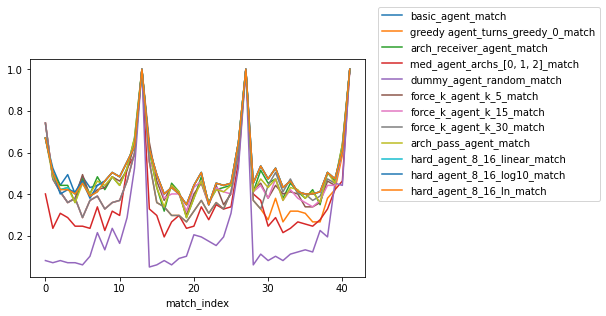

In [20]:
display_pickwise_results('performance_data/VOM_weights_seen_rates_4200_t1_performance.csv',visualization='plot')

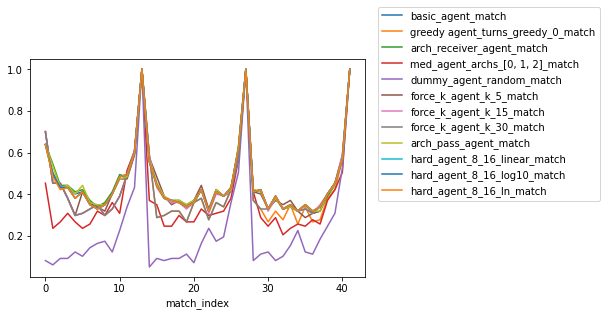

In [21]:
display_pickwise_results('performance_data/VOM_weights_seen_rates_minmax_4200_t1_performance.csv',visualization='plot')

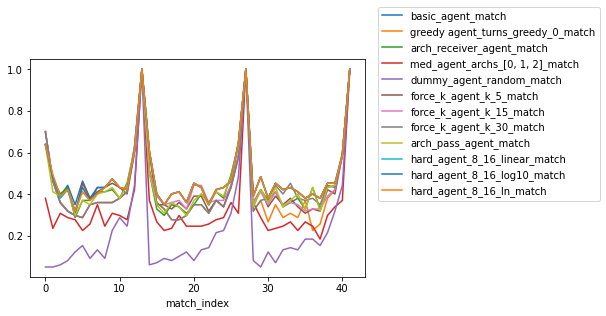

In [22]:
display_pickwise_results('performance_data/VOM_weights_seen_rates_colors_4200_t1_performance.csv',visualization='plot')

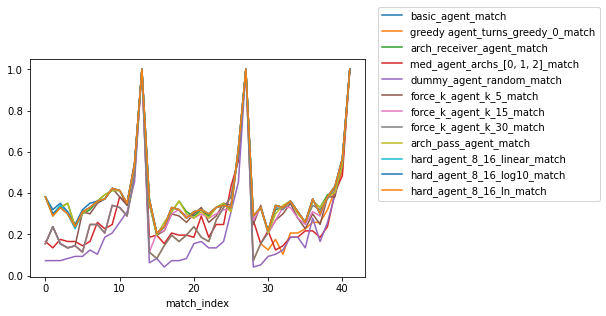

In [23]:
display_pickwise_results('performance_data/VOM_weights_seen_rates_colors_minmax_4200_t1_performance.csv',visualization='plot')

## Testing Accuracies Using the "GD WR " as a our weighting criterion
This field comes from the Games Drawn Win Rate column in the data - I explored this because it seemed like another reasonable metric to look at. It came with a similar challenge to the IWD in that we did not have a value in every archetype. If there were less than 2000 plays, then a card was assigned a weight of 0 for an arch. If a card had above 0 it was either given the global (e.g. all archetypes) va;ue for the card or the archetype specific value when possible. As a result, this follows the new weighing criteria discussed over email. 

I applied additional transforms (e.g. min-max 1-5 or zeroing out noncolor values) to the individual datasets after performing the steps above. There is not too much notable about the results of these experiments. They're about as accurate as the IWD, though zeroing out for color leads to performance over 36%. 

Like I mention in other parts of this report, this metric may not be the best reflection of what drives pick behavior because it is unlikely that drawing a single card or not is a major indicator of card value. For example, a card could be drawn late in the game when you're already losing even if it is good, or it could be drawn too early and the player can't use it until it is too late. In short, our results make sense because this isn't the closest proxy to card value in drafting, though it may speak to card value in deck construction. 

In [24]:
display_draftwise_results('results_data/VOM_Weights_GPWR_4200.csv',include_t3_data=True)

t3_sum                                  0.921699
basic_agent_t3_match                    0.785960
hard_agent_8_16_ln_t3_match             0.785714
hard_agent_8_16_linear_t3_match         0.785714
hard_agent_8_16_log10_t3_match          0.785469
arch_pass_agent_t3_match                0.778105
arch_receiver_agent_t3_match            0.777614
force_k_agent_k_5_t3_match              0.749386
force_k_agent_k_15_t3_match             0.746932
force_k_agent_k_30_t3_match             0.723859
Greedy Agent_turns_greedy_0_t3_match    0.686303
t1_sum                                  0.678694
med_agent_archs_[0, 1, 2]_t3_match      0.544428
basic_agent_match                       0.436426
hard_agent_8_16_log10_match             0.435444
hard_agent_8_16_ln_match                0.435199
hard_agent_8_16_linear_match            0.434462
arch_pass_agent_match                   0.432253
arch_receiver_agent_match               0.431517
force_k_agent_k_5_match                 0.402062
force_k_agent_k_15_m

In [26]:
display_draftwise_results('results_data/VOM_Weights_GPWR_minmax_4200.csv',include_t3_data=True)

t3_sum                                  0.902798
hard_agent_8_16_log10_t3_match          0.778105
hard_agent_8_16_ln_t3_match             0.777614
hard_agent_8_16_linear_t3_match         0.777614
basic_agent_t3_match                    0.777123
arch_receiver_agent_t3_match            0.772214
arch_pass_agent_t3_match                0.770741
force_k_agent_k_5_t3_match              0.716986
force_k_agent_k_15_t3_match             0.696367
force_k_agent_k_30_t3_match             0.648503
t1_sum                                  0.636966
Greedy Agent_turns_greedy_0_t3_match    0.597693
med_agent_archs_[0, 1, 2]_t3_match      0.559892
hard_agent_8_16_log10_match             0.408935
basic_agent_match                       0.408935
hard_agent_8_16_linear_match            0.408689
hard_agent_8_16_ln_match                0.408689
arch_pass_agent_match                   0.408198
arch_receiver_agent_match               0.406235
force_k_agent_k_5_match                 0.369661
force_k_agent_k_15_m

In [27]:
display_draftwise_results('results_data/VOM_Weights_GPWR_colors_4200.csv',include_t3_data=True)

t3_sum                                  0.908444
basic_agent_t3_match                    0.778841
hard_agent_8_16_ln_t3_match             0.778351
hard_agent_8_16_linear_t3_match         0.778351
hard_agent_8_16_log10_t3_match          0.778351
arch_receiver_agent_t3_match            0.769023
arch_pass_agent_t3_match                0.767059
force_k_agent_k_15_t3_match             0.737359
force_k_agent_k_5_t3_match              0.736132
t1_sum                                  0.713058
force_k_agent_k_30_t3_match             0.710849
Greedy Agent_turns_greedy_0_t3_match    0.670594
med_agent_archs_[0, 1, 2]_t3_match      0.535837
arch_pass_agent_match                   0.486500
basic_agent_match                       0.485518
hard_agent_8_16_log10_match             0.485272
hard_agent_8_16_linear_match            0.485027
hard_agent_8_16_ln_match                0.485027
arch_receiver_agent_match               0.484782
force_k_agent_k_5_match                 0.436917
force_k_agent_k_15_m

In [28]:
display_draftwise_results('results_data/VOM_Weights_GPWR_colors_minmax_4200.csv',include_t3_data=True)

t3_sum                                  0.896171
hard_agent_8_16_linear_t3_match         0.778351
hard_agent_8_16_ln_t3_match             0.778105
hard_agent_8_16_log10_t3_match          0.778105
basic_agent_t3_match                    0.778105
arch_receiver_agent_t3_match            0.771232
arch_pass_agent_t3_match                0.771232
force_k_agent_k_5_t3_match              0.713058
force_k_agent_k_15_t3_match             0.693667
t1_sum                                  0.676485
force_k_agent_k_30_t3_match             0.647275
Greedy Agent_turns_greedy_0_t3_match    0.596465
med_agent_archs_[0, 1, 2]_t3_match      0.567501
arch_pass_agent_match                   0.456799
hard_agent_8_16_log10_match             0.456554
basic_agent_match                       0.456554
hard_agent_8_16_linear_match            0.456308
hard_agent_8_16_ln_match                0.456308
arch_receiver_agent_match               0.455572
force_k_agent_k_5_match                 0.402553
force_k_agent_k_15_m

## Re-Testing Accuracies Using the "IWD" as a our weighting criterion
The IWD here is the 'Improvement when drawn' sourced from 17lands. This suggests that the odds of success in a match go up (or down) by drawing the card and serves as a proxy for being good. The process to generate these weights is to take raw 17lands data overall/in archetypes, zero out IWDs for non-mythics with fewer than 2500 selections, and then apply the various transformations (scale 1-5 and additionally 0 out non-color cards) to our various sets. "minmax" in the filename means we scaled 1-5, "colors" means that we zeroed out noncolor cards (e.g. all white cards have a weight of zero in a black blue deck). Generally, the minmax function improved performance and adding an additional layer of filtering on color was detrimental. 

This was our initial measuring stick and frankly, the performance (meaning how well we match human picks) is worse than the other metrics measured here. This is to be expected because not every card may be drawn in every match and so a card being drawn and improving the odds of winning may be a bit too complex of a proxy for the odds somebody picks it. By adding this condition of being drawn as opposed to simply being in the deck, we may be adding in additional noise that makes our bots perform worse.

Also, note that there are two IWD sections in this notebook. The "new" method employs the weighing process we talked about in the email (0 out if seen below 5000). Neither of these are our best metrics, so there's not too much to report here. 

OLD IWD SECTION BELOW:

In [29]:
display_draftwise_results('results_data/VOM_Weights_IWD_4200.csv',include_t3_data=True)

t3_sum                                  0.872116
t1_sum                                  0.651939
force_k_agent_k_30_t3_match             0.626166
Greedy Agent_turns_greedy_0_t3_match    0.612175
force_k_agent_k_15_t3_match             0.603829
force_k_agent_k_5_t3_match              0.594011
hard_agent_8_16_linear_t3_match         0.585174
hard_agent_8_16_log10_t3_match          0.585174
hard_agent_8_16_ln_t3_match             0.584683
basic_agent_t3_match                    0.582474
arch_pass_agent_t3_match                0.577565
arch_receiver_agent_t3_match            0.577320
Greedy Agent_turns_greedy_0_match       0.333333
force_k_agent_k_30_match                0.333088
force_k_agent_k_15_match                0.307315
force_k_agent_k_5_match                 0.304615
hard_agent_8_16_linear_match            0.300196
hard_agent_8_16_ln_match                0.299705
hard_agent_8_16_log10_match             0.299460
basic_agent_match                       0.297742
arch_receiver_agent_

In [30]:
display_draftwise_results('results_data/VOM_Weights_IWD_colors_4200.csv',include_t3_data=True)

t3_sum                                  0.861070
t1_sum                                  0.652921
force_k_agent_k_30_t3_match             0.606775
Greedy Agent_turns_greedy_0_t3_match    0.604566
hard_agent_8_16_log10_t3_match          0.597938
hard_agent_8_16_ln_t3_match             0.597938
hard_agent_8_16_linear_t3_match         0.597202
basic_agent_t3_match                    0.596711
force_k_agent_k_15_t3_match             0.590820
force_k_agent_k_5_t3_match              0.527000
arch_receiver_agent_t3_match            0.502946
arch_pass_agent_t3_match                0.502209
med_agent_archs_[0, 1, 2]_t3_match      0.383652
hard_agent_8_16_linear_match            0.353706
hard_agent_8_16_log10_match             0.352970
hard_agent_8_16_ln_match                0.352725
basic_agent_match                       0.351497
force_k_agent_k_15_match                0.337261
force_k_agent_k_30_match                0.336279
force_k_agent_k_5_match                 0.332597
Greedy Agent_turns_g

In [31]:
display_draftwise_results('results_data/VOM_Weights_IWD_minmax_4200.csv',include_t3_data=True)

t3_sum                                  0.829406
Greedy Agent_turns_greedy_0_t3_match    0.624939
force_k_agent_k_30_t3_match             0.613893
force_k_agent_k_15_t3_match             0.598429
force_k_agent_k_5_t3_match              0.595974
arch_pass_agent_t3_match                0.589347
arch_receiver_agent_t3_match            0.589347
basic_agent_t3_match                    0.587874
med_agent_archs_[0, 1, 2]_t3_match      0.587629
hard_agent_8_16_ln_t3_match             0.587138
hard_agent_8_16_linear_t3_match         0.587138
hard_agent_8_16_log10_t3_match          0.587138
t1_sum                                  0.542710
arch_pass_agent_match                   0.295533
arch_receiver_agent_match               0.295533
hard_agent_8_16_linear_match            0.294305
basic_agent_match                       0.294305
hard_agent_8_16_ln_match                0.294305
hard_agent_8_16_log10_match             0.294060
med_agent_archs_[0, 1, 2]_match         0.292833
force_k_agent_k_5_ma

In [32]:
display_draftwise_results('results_data/VOM_Weights_IWD_colors_minmax_4200.csv',include_t3_data=True)

t3_sum                                  0.813206
hard_agent_8_16_log10_t3_match          0.599411
basic_agent_t3_match                    0.599411
hard_agent_8_16_ln_t3_match             0.599165
hard_agent_8_16_linear_t3_match         0.599165
arch_pass_agent_t3_match                0.597202
arch_receiver_agent_t3_match            0.597202
force_k_agent_k_5_t3_match              0.585665
force_k_agent_k_15_t3_match             0.574129
med_agent_archs_[0, 1, 2]_t3_match      0.571429
force_k_agent_k_30_t3_match             0.552037
Greedy Agent_turns_greedy_0_t3_match    0.545164
t1_sum                                  0.539028
arch_receiver_agent_match               0.279087
arch_pass_agent_match                   0.277614
basic_agent_match                       0.276632
hard_agent_8_16_log10_match             0.275405
hard_agent_8_16_linear_match            0.275405
hard_agent_8_16_ln_match                0.275160
force_k_agent_k_5_match                 0.271478
med_agent_archs_[0, 

NEW IWD SECTION BELOW:

In [33]:
display_draftwise_results('results_data/VOM_Weights_IWD_newmethod_4200.csv',include_t3_data=True)

t3_sum                                  0.877270
t1_sum                                  0.650957
force_k_agent_k_30_t3_match             0.616348
Greedy Agent_turns_greedy_0_t3_match    0.605056
force_k_agent_k_15_t3_match             0.596711
force_k_agent_k_5_t3_match              0.594256
hard_agent_8_16_linear_t3_match         0.581001
hard_agent_8_16_ln_t3_match             0.580265
hard_agent_8_16_log10_t3_match          0.579283
basic_agent_t3_match                    0.577320
arch_receiver_agent_t3_match            0.571674
arch_pass_agent_t3_match                0.571183
force_k_agent_k_30_match                0.325233
Greedy Agent_turns_greedy_0_match       0.321306
force_k_agent_k_5_match                 0.315660
hard_agent_8_16_linear_match            0.299215
hard_agent_8_16_ln_match                0.298478
hard_agent_8_16_log10_match             0.298478
force_k_agent_k_15_match                0.297251
basic_agent_match                       0.295533
arch_receiver_agent_

In [34]:
display_draftwise_results('results_data/VOM_Weights_IWD_newmethod_minmax_4200.csv',include_t3_data=True)

t3_sum                                  0.816642
Greedy Agent_turns_greedy_0_t3_match    0.629357
force_k_agent_k_30_t3_match             0.620520
force_k_agent_k_15_t3_match             0.609475
arch_receiver_agent_t3_match            0.608493
force_k_agent_k_5_t3_match              0.608247
arch_pass_agent_t3_match                0.607757
basic_agent_t3_match                    0.598920
hard_agent_8_16_ln_t3_match             0.597447
hard_agent_8_16_log10_t3_match          0.597202
hard_agent_8_16_linear_t3_match         0.596956
med_agent_archs_[0, 1, 2]_t3_match      0.587629
t1_sum                                  0.546883
arch_pass_agent_match                   0.298969
arch_receiver_agent_match               0.298724
basic_agent_match                       0.295533
hard_agent_8_16_log10_match             0.294551
hard_agent_8_16_ln_match                0.294551
hard_agent_8_16_linear_match            0.294305
med_agent_archs_[0, 1, 2]_match         0.294305
force_k_agent_k_30_m

In [35]:
display_draftwise_results('results_data/VOM_Weights_IWD_newmethod_colors_4200.csv',include_t3_data=True)

t3_sum                                  0.851006
t1_sum                                  0.651203
Greedy Agent_turns_greedy_0_t3_match    0.598675
force_k_agent_k_30_t3_match             0.597202
hard_agent_8_16_log10_t3_match          0.591556
hard_agent_8_16_linear_t3_match         0.591065
hard_agent_8_16_ln_t3_match             0.590574
basic_agent_t3_match                    0.586402
force_k_agent_k_15_t3_match             0.583456
force_k_agent_k_5_t3_match              0.519637
arch_receiver_agent_t3_match            0.478645
arch_pass_agent_t3_match                0.472509
med_agent_archs_[0, 1, 2]_t3_match      0.398135
basic_agent_match                       0.347815
hard_agent_8_16_ln_match                0.347570
hard_agent_8_16_linear_match            0.347570
hard_agent_8_16_log10_match             0.347079
force_k_agent_k_30_match                0.330879
Greedy Agent_turns_greedy_0_match       0.325724
force_k_agent_k_15_match                0.325479
force_k_agent_k_5_ma

In [36]:
display_draftwise_results('results_data/VOM_Weights_IWD_newmethod_colors_minmax_4200.csv',include_t3_data=True)

t3_sum                                  0.817133
arch_receiver_agent_t3_match            0.623466
arch_pass_agent_t3_match                0.622730
basic_agent_t3_match                    0.619293
hard_agent_8_16_ln_t3_match             0.619048
hard_agent_8_16_linear_t3_match         0.618802
hard_agent_8_16_log10_t3_match          0.618802
force_k_agent_k_5_t3_match              0.602356
force_k_agent_k_15_t3_match             0.590820
force_k_agent_k_30_t3_match             0.569710
med_agent_archs_[0, 1, 2]_t3_match      0.567747
Greedy Agent_turns_greedy_0_t3_match    0.562592
t1_sum                                  0.543937
basic_agent_match                       0.281296
arch_pass_agent_match                   0.281051
arch_receiver_agent_match               0.280805
hard_agent_8_16_log10_match             0.280560
hard_agent_8_16_ln_match                0.280560
hard_agent_8_16_linear_match            0.280314
force_k_agent_k_5_match                 0.276878
med_agent_archs_[0, 

In [37]:
#!jupyter nbconvert --to html Progress_Report_EOM_March.ipynb